# Methods Used
- Multiple Linear Regression
- Polynomial Regression
- Regularization (Ridge(L2), Lasso(L1), ElasticNet)

In [1]:
# libraries for dataframes & array handling
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
sns.set_theme(style='darkgrid', palette='inferno')

# library to ignore warnings that arise during visualizations
import warnings
warnings.filterwarnings('ignore')

In [2]:
# SKLEARN CLASSES & LIBRARIES

# importing train test split & GridSearchCV (for performing grid search on various model parmeters)
from sklearn.model_selection import train_test_split, GridSearchCV

# import StandarScaler for data Standardization
from sklearn.preprocessing import StandardScaler

# importing linear regression, polynomial regression, Regulariation classes (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

# importing model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, SCORERS

In [3]:
df = pd.read_csv('Advertising Budget and Sales.csv', index_col=0)
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [4]:
# renaming all the columns for ease of use
df.rename({'TV Ad Budget ($)':'TV',
           'Radio Ad Budget ($)':'Radio',
           'Newspaper Ad Budget ($)':'Newspaper',
           'Sales ($)':'Sales'},axis=1, inplace=True)

In [5]:
# getting basic data info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
# getting basic statisics for our data, as all the columns are of numerical category
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# checking shape of dataframe
df.shape

(200, 4)

In [8]:
# checking for null vlaues
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

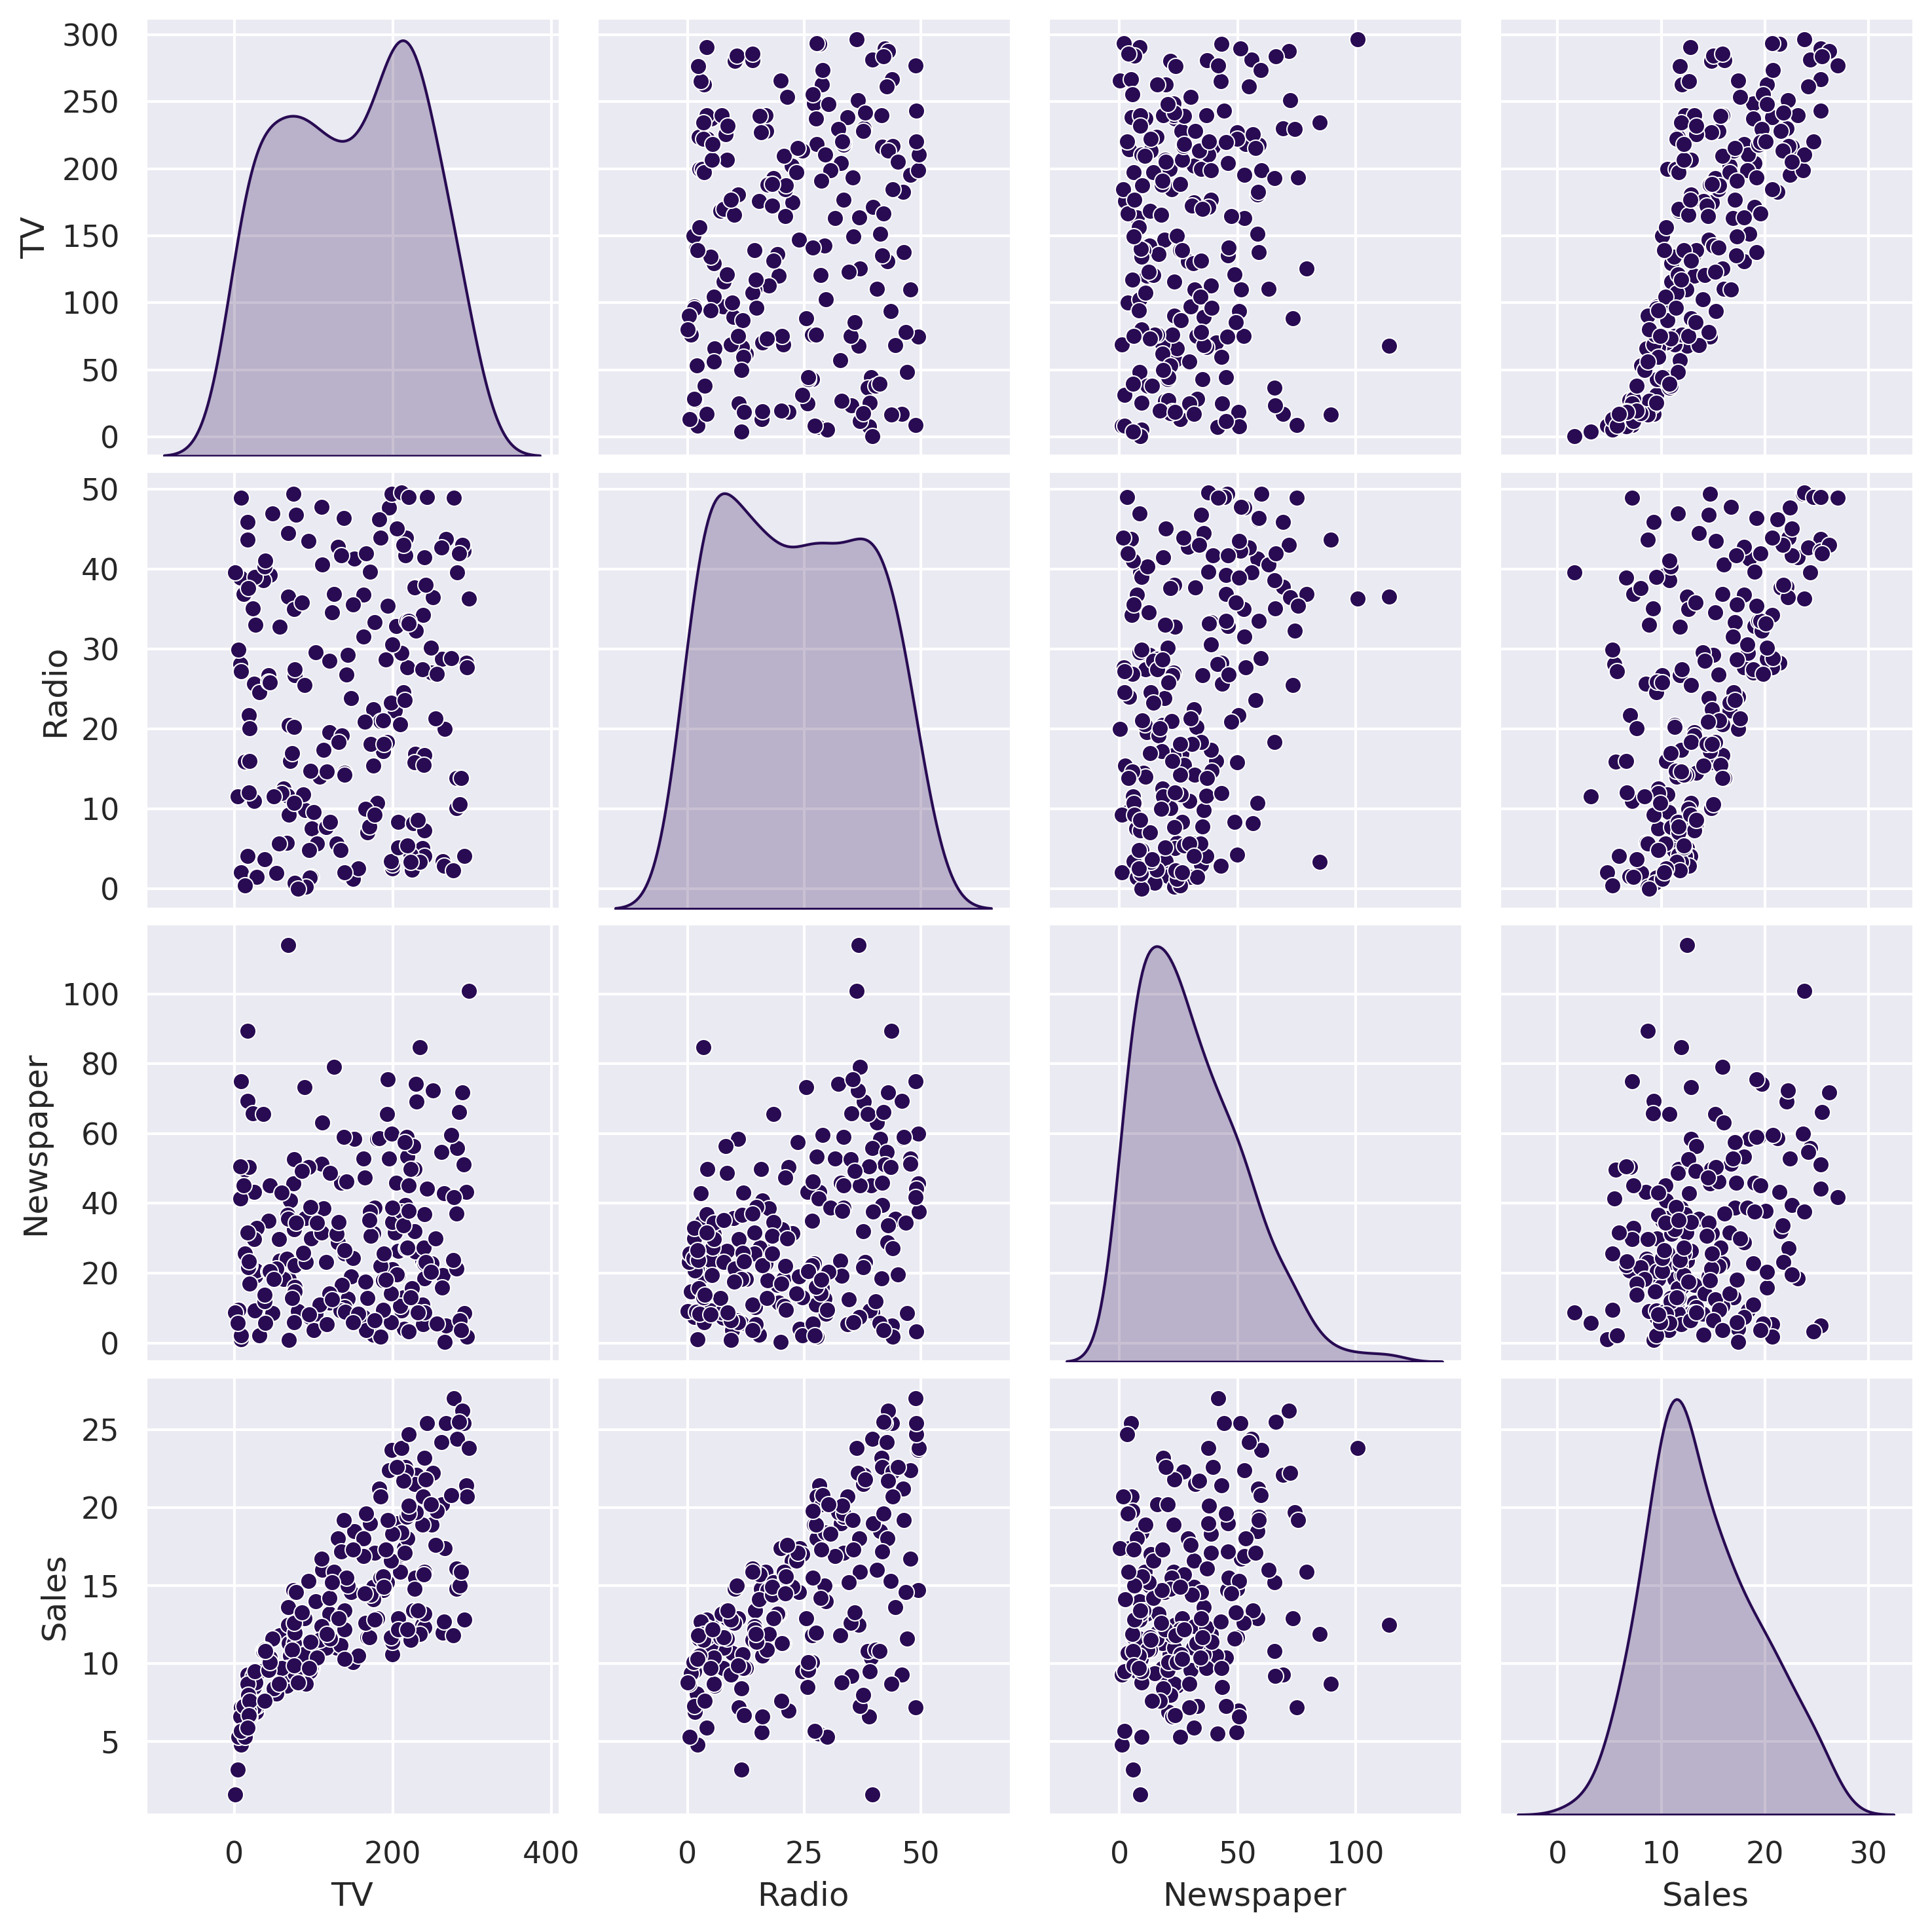

In [9]:
# creating a pair plot to visualize realtionship between all the columns at once
sns.pairplot(df, diag_kind='kde')

#### As we have to predict sales based on advertisment budget on TV, Radio & Newspaper, we check correlation between variables and sales column
- High correlation between TV & Sales
- moderate correlation between Radio & Sales
- very low correlation between Newspaper & sales

- data seem to be sort of normally distributed

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

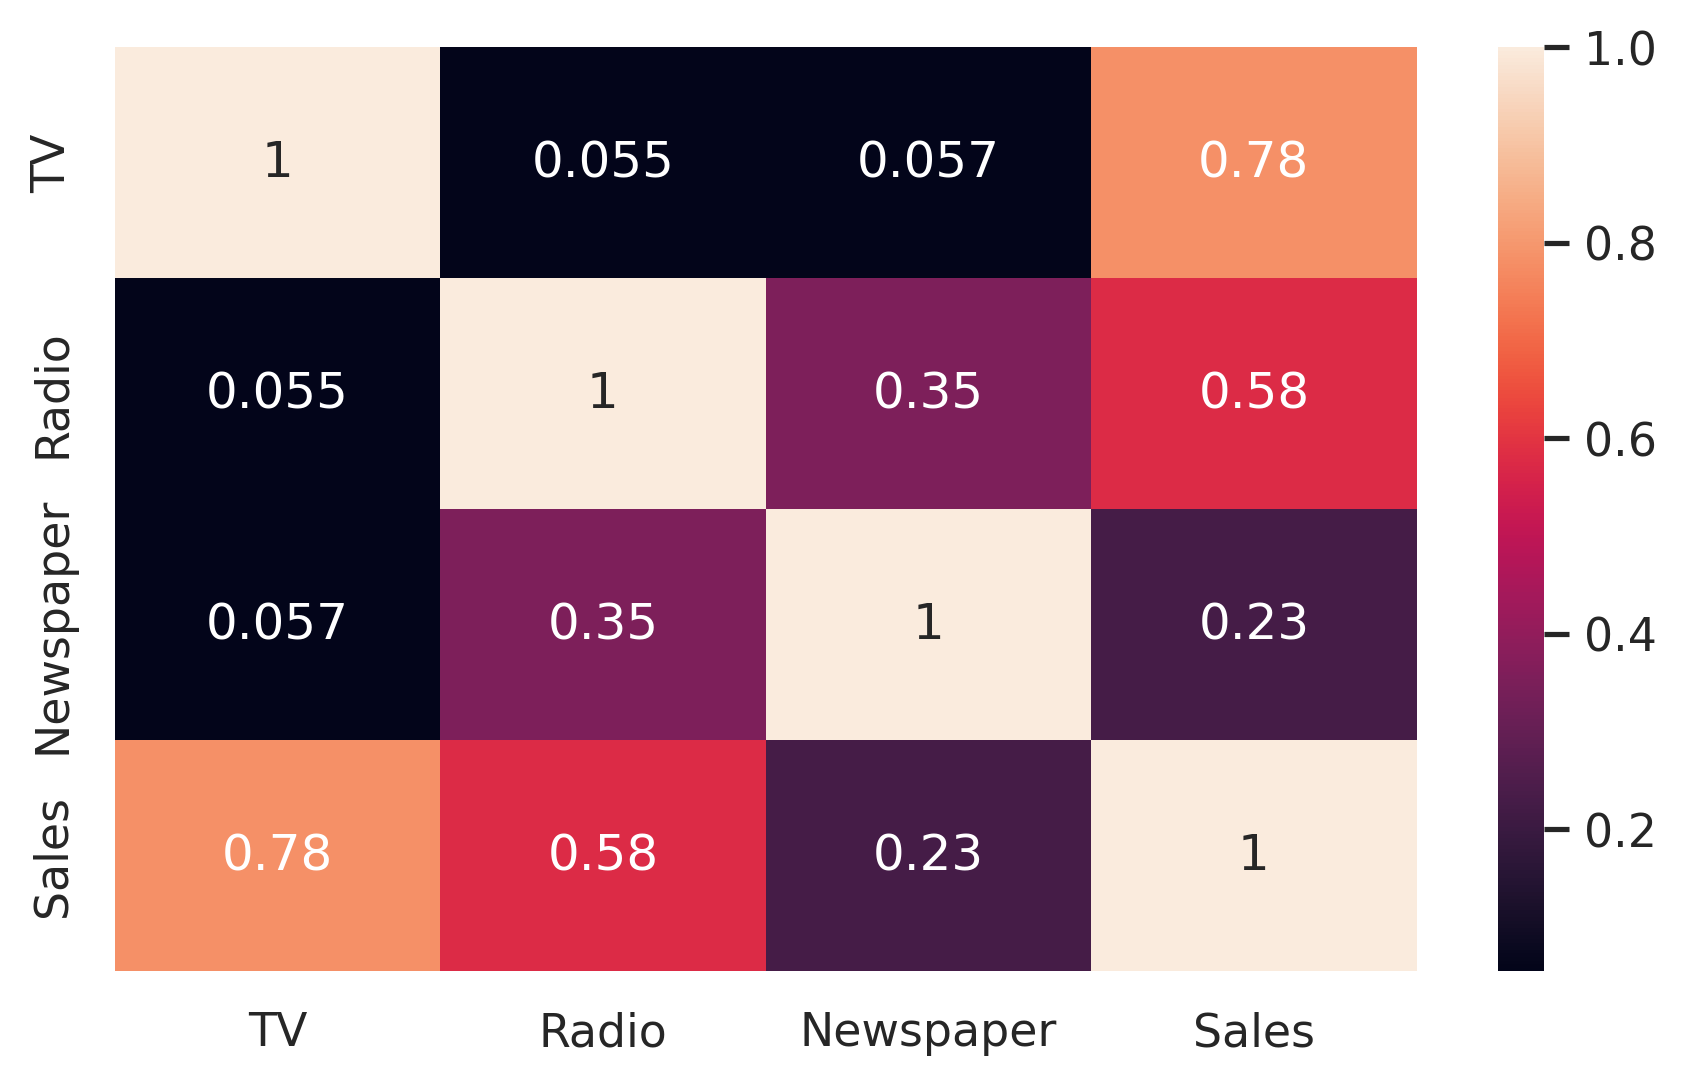

In [10]:
# checking for correlation
print(df.corr())
sns.heatmap(df.corr(),annot=True)

# Multiple Linear Regression
- Multiple linear regression allows us to build a linear relationship between mulitple feartures to estimate a target variable
- Goal - To predict target variable based of features

In [11]:
# splititng data into features (x) & target(y)
x = df.drop('Sales',axis = 1)
y = df['Sales']

# train test split of target & features
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(140, 140, 60, 60)

In [13]:
# crearing a model instance from Linear Regression Class
linear_model = LinearRegression()

In [14]:
# training the model on training data
linear_model.fit(x_train, y_train)

LinearRegression()

In [15]:
# making predictions on test data using trained model
linear_predict = linear_model.predict(x_test)

# checking predicted values
linear_predict

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [16]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

linear_MAE = mean_absolute_error(y_test, linear_predict)
linear_MSE = mean_squared_error(y_test, linear_predict)
linear_RMSE = np.sqrt(mean_squared_error(y_test, linear_predict)) # root mean sqaured error
linear_R2 = r2_score(y_test, linear_predict)

print('Mean absolute error for linear regression ',linear_MAE)
print('Mean squared error for linear regression ',linear_MSE)
print('Root Mean Squared error for linear regression ',linear_RMSE)
print('Accuracy for linear regression ',linear_R2*100)

Mean absolute error for linear regression  1.5116692224549086
Mean squared error for linear regression  3.79679723671522
Root Mean Squared error for linear regression  1.9485372043446387
Accuracy for linear regression  86.09466508230368


# Polynomial Regression
- polynomial regression is used to improve our regression model by considering higher order relationship between features

In [17]:
# creating polynomial & fitting of features with degree 2 
# here bias is the colum of 1's as x to power 0 = 1, to elemate bias we keep include bias = false
# as there are multiple features the dataset will also contain interaction between features (X1+X2,X2+X3, X1+X3)

x_poly = df.drop('Sales',axis = 1)
y_poly = df['Sales']
poly_convert = PolynomialFeatures(degree=2, include_bias=False)
poly_transfrom = poly_convert.fit_transform(x_poly)

In [18]:
# shape of our new dataset is 200 rows by 9 columns 
# columns are as follows(x1, x2, x3,x1 squared, x2 squared, x3 squared, x1+x2, x2+x3, x1+x3)
poly_transfrom.shape

(200, 9)

In [19]:
# creating a train test split on our polynomial data
x_train,x_test, y_train, y_test = train_test_split(poly_transfrom,y_poly,test_size=0.3,random_state=42)

In [20]:
# creating a linear regression model instance from its class

poly_model = LinearRegression()

In [21]:
# training linear regression model on our polynomial data

poly_model.fit(x_train,y_train)

LinearRegression()

In [22]:
# making predctions on x test data using trained polynomial model
poly_predict = poly_model.predict(x_test)

In [23]:
# checking model coefficients 
poly_model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [24]:
# checking model intercept
poly_model.intercept_

4.718521645342706

In [25]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

poly_MAE = mean_absolute_error(y_test, poly_predict)
poly_MSE = mean_squared_error(y_test, poly_predict)
poly_RMSE = np.sqrt(mean_squared_error(y_test, poly_predict)) # root mean sqaured error
poly_R2 = r2_score(y_test, poly_predict)

print('Mean absolute error for Polynomial regression ',poly_MAE)
print('Mean squared error for Polynomial regression ',poly_MSE)
print('Root Mean Squared error for Polynomail regression ',poly_RMSE)
print('Accuracy for Polynomial regression ',poly_R2*100)

Mean absolute error for Polynomial regression  0.5905974833808105
Mean squared error for Polynomial regression  0.52319449490555
Root Mean Squared error for Polynomail regression  0.7233218473857609
Accuracy for Polynomial regression  98.0838600996637


# Regularization
- ***the main goal of regularization is to balence the fit between training data to avoid overfititng**,  regularization is used to minimize model complexity, it penalizes loss function that have higher slope, it reduces overfitting (it adds more bias to reduce model variance)
- **Ridge** - it simply adds more bias  to reduce slop value
- **lasso** - adds penalty equal to slop & limits the size of coeffcients, it perfroms variable selection by forcing some coeffcients exactly = 0 when tuning parameter is sufficiently large
- **ElasticNet** - combination of Ridge (reduction of overfitting) & Lasso (feature selection)

## Ridge Regression

In [26]:
# we use polynomial featues for Regularization for btter understanding

In [27]:
# scaling data 
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [28]:
# checking various scoring metrics
# we can use these scoring keys to check for best performing model based on specified scores
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

- in ridgeCV we set various values of alplha and the model runs on all the passed values of aplha and fits on the best 
- performing aplha value based on passed scoring method

- Generally ridgecv model assumes that higher the score better the model, but for mean absolute error - lower value is better
- so we use neg_mean_absolute_error as scoring method to get 1-mean_absolute_error which follows property of mean aboslute error

In [29]:
# creating ridge model & setting its hyperparameters
ridge_model = RidgeCV(alphas=(0.1,1,10),scoring='neg_mean_absolute_error', cv = 5)

In [30]:
ridge_model.fit(scaled_x_train, y_train)

RidgeCV(alphas=(0.1, 1, 10), cv=5, scoring='neg_mean_absolute_error')

In [31]:
# best performing alpha value
ridge_model.alpha_

1.0

In [32]:
# predict method automatically fit predictions on best performing parameters
ridge_predict = ridge_model.predict(scaled_x_test)

In [33]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

ridge_MAE = mean_absolute_error(y_test, ridge_predict)
ridge_MSE = mean_squared_error(y_test, ridge_predict)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, ridge_predict)) # root mean sqaured error
ridge_R2 = r2_score(y_test, ridge_predict)

print('Mean absolute error for Ridge regression ',ridge_MAE)
print('Mean squared error for Ridge regression ',ridge_MSE)
print('Root Mean Squared error for Ridge regression ',ridge_RMSE)
print('Accuracy for Ridge regression ',ridge_R2*100)

Mean absolute error for Ridge regression  0.5582981374678166
Mean squared error for Ridge regression  0.4857070381568478
Root Mean Squared error for Ridge regression  0.6969268528022491
Accuracy for Ridge regression  98.22115361543605


# Lasso Regression

-  in LassoCV we set various values of alplha and the model runs on all the passed values of aplha and fits on the best performing aplha value based on passed scoring method

In [34]:
# eps - stands for epsilon and is used to set a stopping criterion for the algorithm. 
# In practical terms, "eps" controls how close the algorithm should get to the optimal solution 
# before terminating. 
# Smaller values of "eps" lead to more accurate solutions 
# alpha = List of alphas where to compute the models
# cv = Determines the cross-validation splitting strategy (For int/None inputs, KFold is used.)

lasso_model = LassoCV(eps = 0.01,n_alphas=100,cv = 5)

In [35]:
lasso_model.fit(scaled_x_train, y_train)

LassoCV(cv=5, eps=0.01)

In [36]:
# as we set value of aplhas - 100 model checked performance on 100 values of aplha
len(lasso_model.alphas_)

100

In [37]:
# best performing alpha value
lasso_model.alphas_

array([4.92453181, 4.70070424, 4.48704997, 4.28310663, 4.08843282,
       3.90260724, 3.72522772, 3.55591037, 3.39428875, 3.24001309,
       3.0927495 , 2.95217926, 2.81799815, 2.68991579, 2.56765497,
       2.45095108, 2.33955157, 2.23321535, 2.13171226, 2.03482265,
       1.94233682, 1.85405461, 1.76978497, 1.68934551, 1.61256215,
       1.53926871, 1.46930657, 1.40252432, 1.33877743, 1.27792793,
       1.21984413, 1.16440033, 1.11147654, 1.06095822, 1.01273603,
       0.96670561, 0.92276735, 0.88082615, 0.84079124, 0.80257598,
       0.76609767, 0.73127734, 0.69803966, 0.66631268, 0.63602774,
       0.6071193 , 0.57952479, 0.55318449, 0.5280414 , 0.50404111,
       0.48113166, 0.45926348, 0.43838925, 0.41846378, 0.39944396,
       0.38128861, 0.36395846, 0.34741598, 0.33162539, 0.31655251,
       0.30216471, 0.28843085, 0.27532123, 0.26280745, 0.25086245,
       0.23946036, 0.22857652, 0.21818736, 0.20827041, 0.1988042 ,
       0.18976824, 0.18114298, 0.17290975, 0.16505074, 0.15754

In [38]:
# lassoCV forces some of coeff to be exactly = 0 when tuning parameters is sifficiently large
# due to which variable selection becomes easy
lasso_model.coef_

array([ 2.84952614,  0.4601795 ,  0.        , -1.28407061,  3.45700747,
       -0.        ,  0.02987617,  0.10584147,  0.        ])

In [39]:
# best perfroming alpha vlaue
lasso_model.alpha_

0.04924531806474871

In [40]:
lasso_prdict = lasso_model.predict(scaled_x_test)

In [41]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

lasso_MAE = mean_absolute_error(y_test, lasso_prdict)
lasso_MSE = mean_squared_error(y_test, lasso_prdict)
lasso_RMSE = np.sqrt(mean_squared_error(y_test, lasso_prdict)) # root mean sqaured error
lasso_R2 = r2_score(y_test, lasso_prdict)

print('Mean absolute error for Ridge regression ',lasso_MAE)
print('Mean squared error for Ridge regression ',lasso_MSE)
print('Root Mean Squared error for Ridge regression ',lasso_RMSE)
print('Accuracy for Ridge regression ',lasso_R2*100)

Mean absolute error for Ridge regression  0.5285409080907807
Mean squared error for Ridge regression  0.4960638576693697
Root Mean Squared error for Ridge regression  0.7043180089060408
Accuracy for Ridge regression  98.18322295045054


## ElasticNet

In [42]:
# creating a elssticnet model from its instance
# l1_ratio is ratio of weightage lasso regression to ridge regression
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],eps = 0.001,n_alphas=100, cv =5)

In [43]:
# training the model
elastic_model.fit(scaled_x_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [44]:
# best perfroming ratio of l1
elastic_model.l1_ratio_

0.95

In [45]:
elastic_model.coef_

array([ 4.35979063,  0.23956511,  0.19157524, -2.63405535,  3.55356572,
       -0.41823125,  0.17873115,  0.17717911,  0.10049184])

In [46]:
elastic_predict = elastic_model.predict(scaled_x_test)

In [47]:
# checking model performance by using various evaluation metrics 
# (it compares actual y_test and predicted values)

elastic_MAE = mean_absolute_error(y_test, elastic_predict)
elastic_MSE = mean_squared_error(y_test, elastic_predict)
elastic_RMSE = np.sqrt(mean_squared_error(y_test, elastic_predict)) # root mean sqaured error
elastic_R2 = r2_score(y_test, lasso_prdict)

print('Mean absolute error for ElastiNet  ',lasso_MAE)
print('Mean squared error for ElastiNet ',lasso_MSE)
print('Root Mean Squared error for ElastiNet ',lasso_RMSE)
print('Accuracy for ElastiNet ',lasso_R2*100)

Mean absolute error for ElastiNet   0.5285409080907807
Mean squared error for ElastiNet  0.4960638576693697
Root Mean Squared error for ElastiNet  0.7043180089060408
Accuracy for ElastiNet  98.18322295045054


In [48]:
dict = {'Index' : ['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error', 'Accuracy'],
        'Linear Regression':[linear_MAE,linear_MSE,linear_RMSE,linear_R2*100],
        'Polynomial Regression':[poly_MAE,poly_MSE,poly_RMSE,poly_R2*100],
        'Ridge Regression':[ridge_MAE,ridge_MSE,ridge_RMSE,ridge_R2*100],
        'Lasso Regression':[lasso_MAE,lasso_MSE,lasso_RMSE,lasso_R2*100],
        'ElasticNet Regression':[elastic_MAE,elastic_MSE,elastic_RMSE,elastic_R2*100]}

In [49]:
pd.DataFrame(dict)

,Index,Linear Regression,Polynomial Regression,Ridge Regression,Lasso Regression,ElasticNet Regression
0,Mean Absolute Error,1.511669,0.590597,0.558298,0.528541,0.564140
1,Mean Squared Error,3.796797,0.523194,0.485707,0.496064,0.473805
2,Root Mean Squared Error,1.948537,0.723322,0.696927,0.704318,0.688335
3,Accuracy,86.094665,98.083860,98.221154,98.183223,98.183223


## final interpetation
- **ElasticNet Regularization is best perfroming model for the given dataset**
- all the regulariazation techniques gave similar accuracy but there is slight difference in Root mean squared error.